# Importing dataset and libs

In [25]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
from matplotlib.pyplot import style
style.use("ggplot")

from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

replays = pd.read_csv('../data/starcraft.csv')

In [26]:
replays.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,...,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilityUsed,MaxTimeStamp
0,52,5,27.0,10.0,3000.0,143.7180,0.003515,0.000220,0.000055,0.000110,...,0.004849,32.6677,40.8673,4.7508,0.000220,0.001397,0.000047,0.0,0.000000,127448
1,55,5,23.0,10.0,5000.0,129.2322,0.003304,0.000259,0.000069,0.000294,...,0.004307,32.9194,42.3454,4.8434,0.000381,0.001194,0.000087,0.0,0.000208,57812
2,56,4,30.0,10.0,200.0,69.9612,0.001101,0.000336,0.000042,0.000294,...,0.002926,44.6475,75.3548,4.0430,0.000231,0.000745,0.000063,0.0,0.000189,95360
3,57,3,19.0,20.0,400.0,107.6016,0.001034,0.000213,0.000011,0.000053,...,0.003783,29.2203,53.7352,4.9155,0.000202,0.000426,0.000075,0.0,0.000384,93852
4,58,3,32.0,10.0,500.0,122.8908,0.001136,0.000327,0.000039,0.000000,...,0.002368,22.6885,62.0813,9.3740,0.000289,0.001174,0.000077,0.0,0.000019,51936


# Cleaning

In [27]:
# deleting one row with 1 million hours of playtime
replays = replays[replays['TotalHours'] != 1000000]

replays.dropna(inplace=True)
replays.isnull().values.any()

replays.describe()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,...,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilityUsed,MaxTimeStamp
count,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,...,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000
mean,4719.426131,4.120467,21.651483,15.907102,661.039257,114.525764,0.004017,0.000364,0.000058,0.000094,...,0.003433,40.717594,64.218000,5.266780,0.000282,0.001031,0.000085,0.000060,0.000142,83748.656877
std,2657.307846,1.448307,4.206512,11.965468,856.348806,48.032308,0.004715,0.000210,0.000038,0.000159,...,0.000965,17.058352,19.034036,1.500796,0.000086,0.000520,0.000025,0.000112,0.000266,33612.702540
min,52.000000,1.000000,16.000000,0.000000,3.000000,22.059600,0.000000,0.000000,0.000000,0.000000,...,0.000679,6.666700,24.632600,2.038900,0.000091,0.000077,0.000020,0.000000,0.000000,25224.000000
25%,2423.000000,3.000000,19.000000,8.000000,300.000000,79.229400,0.001244,0.000202,0.000032,0.000000,...,0.002743,29.328700,50.929400,4.261500,0.000224,0.000682,0.000068,0.000000,0.000000,60116.000000
50%,4787.000000,4.000000,21.000000,12.000000,500.000000,107.067600,0.002444,0.000349,0.000053,0.000039,...,0.003376,37.060500,61.303300,5.086800,0.000269,0.000904,0.000082,0.000000,0.000021,81044.000000
75%,6995.000000,5.000000,24.000000,20.000000,800.000000,140.090400,0.004938,0.000493,0.000078,0.000114,...,0.004003,48.512000,74.032800,6.027500,0.000324,0.001258,0.000099,0.000087,0.000182,102156.000000
max,9271.000000,7.000000,44.000000,168.000000,25000.000000,389.831400,0.043088,0.001648,0.000338,0.003019,...,0.007971,237.142900,176.372100,18.558100,0.000832,0.005149,0.000202,0.000902,0.003084,388032.000000


## LeagueIndex spread

Text(0,0.5,'Amount of replays')

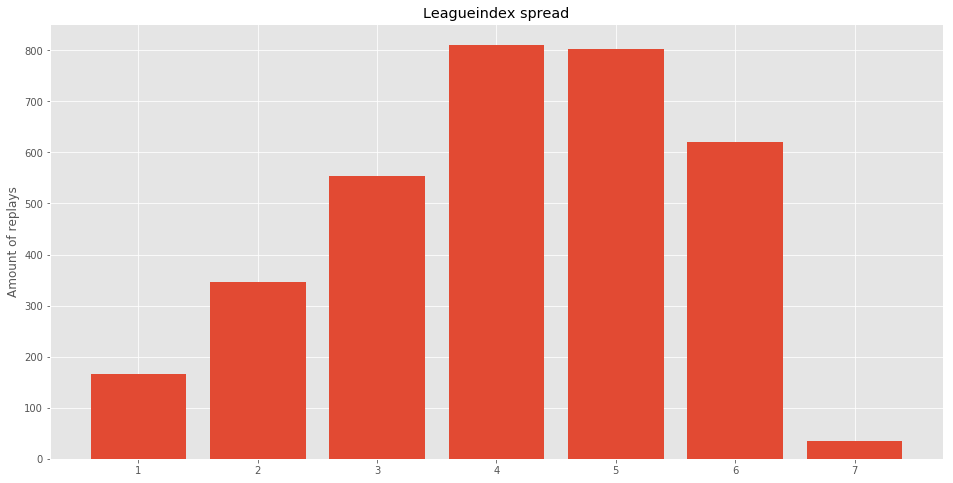

In [34]:
plt.figure(figsize=(16, 8));

leagueCounts = replays['LeagueIndex'].value_counts().sort_index()

labels = leagueCounts.index.values.tolist()
y_pos = np.arange(len(labels))

# print(leagueCounts)
# print(replays.groupby('LeagueIndex').count())

plt.bar(y_pos, leagueCounts, align='center', alpha=1)
plt.xticks(y_pos, labels)

plt.title('Leagueindex spread')
plt.ylabel('Amount of replays')


## Combining LeagueIndexes

Text(0,0.5,'Amount of replays')

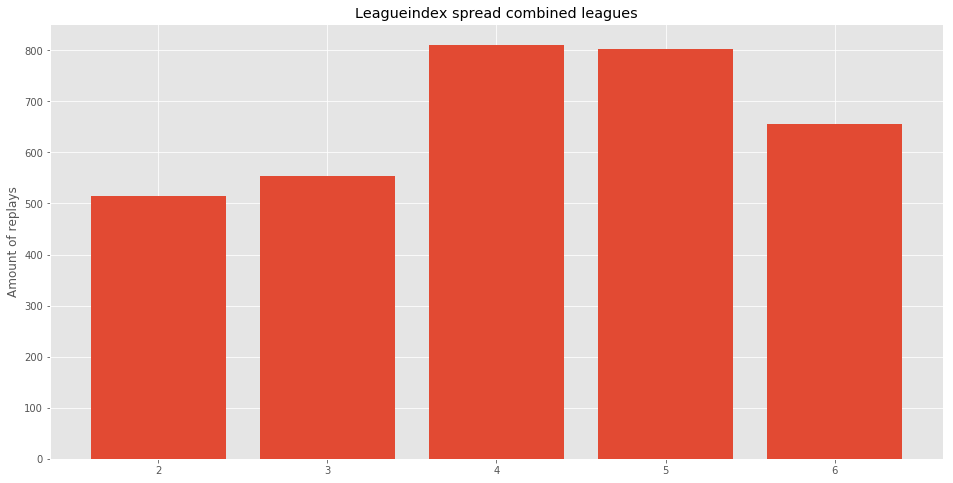

In [35]:
replays.loc[replays['LeagueIndex'] == 1, 'LeagueIndex'] = 2
replays.loc[replays['LeagueIndex'] == 7, 'LeagueIndex'] = 6

leagueCounts = replays['LeagueIndex'].value_counts().sort_index()
labels = leagueCounts.index.values.tolist()
y_pos = np.arange(len(labels))

plt.figure(figsize=(16, 8));
plt.bar(y_pos, leagueCounts, align='center', alpha=1)
plt.xticks(y_pos, labels)
plt.title('Leagueindex spread combined leagues')
plt.ylabel('Amount of replays')

# Plotting LeagueIndex against other features

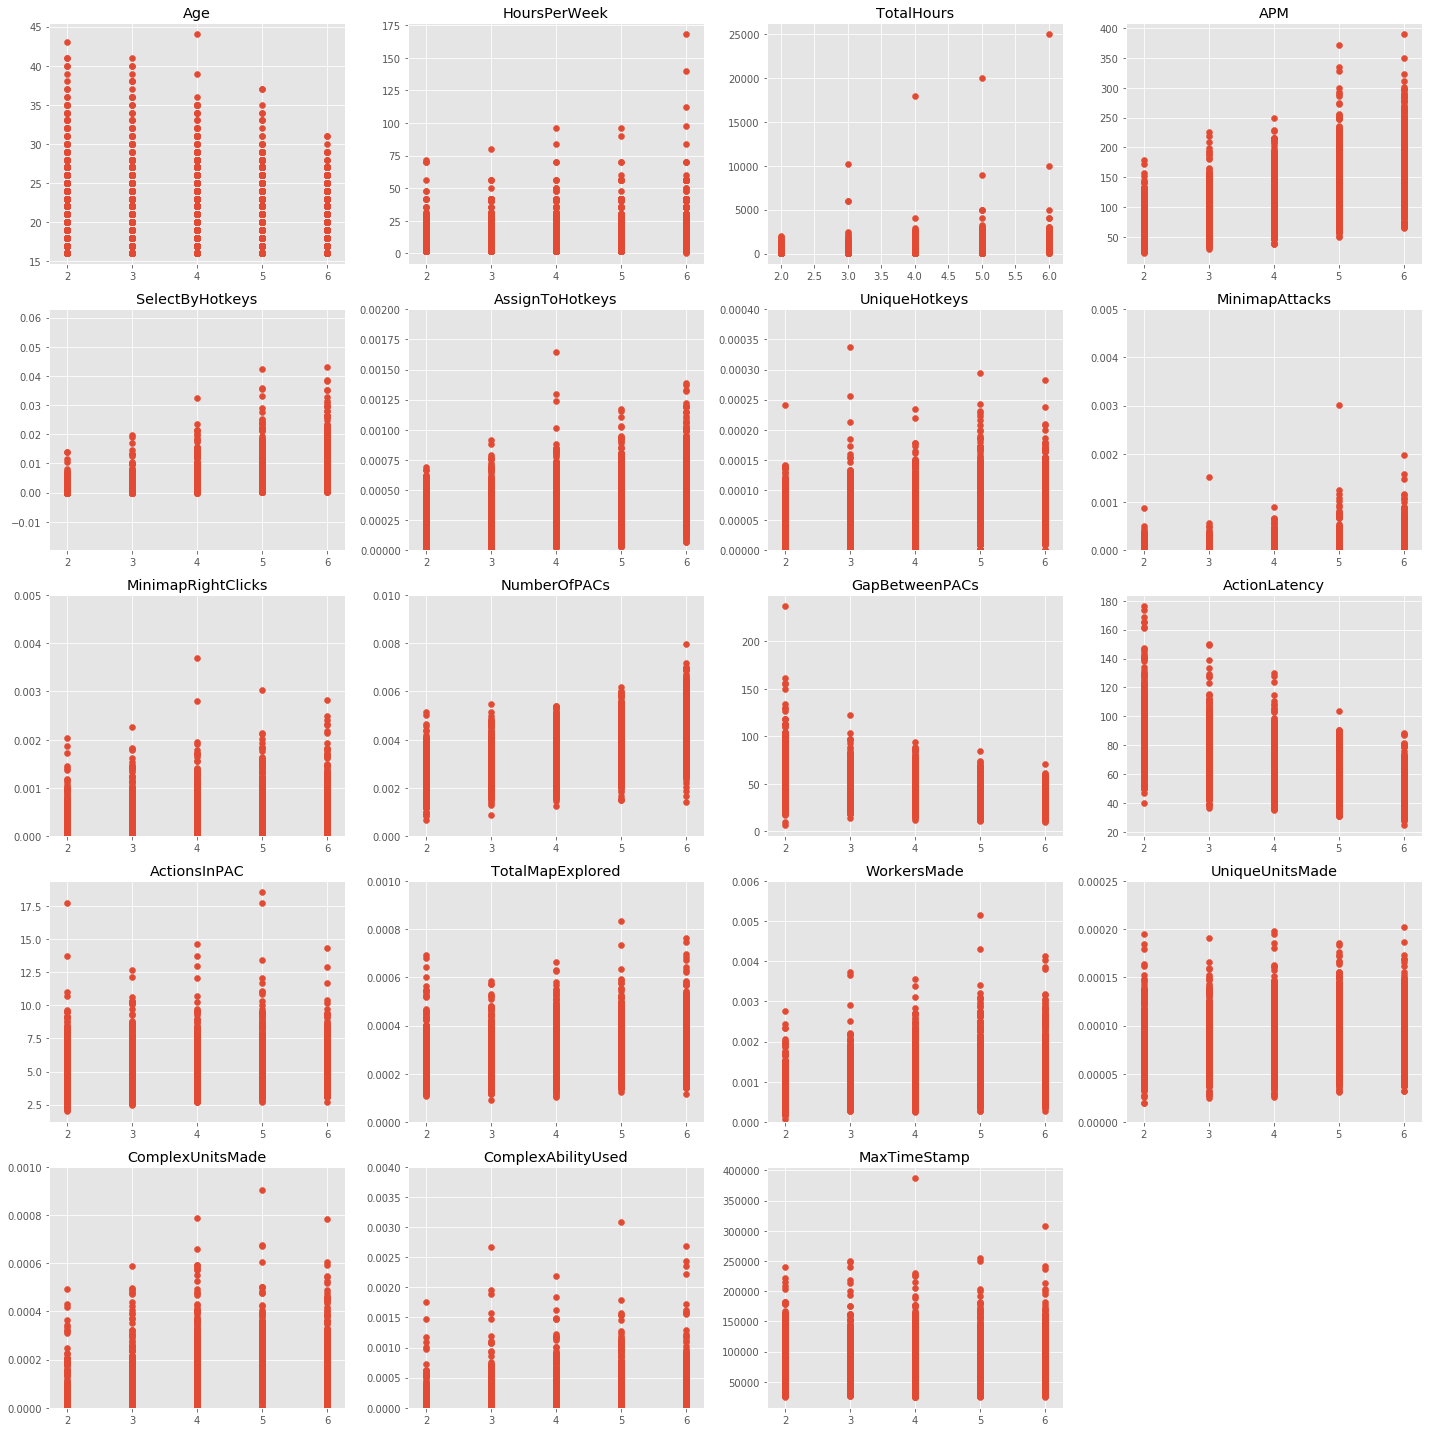

In [38]:
plt.figure(figsize=(20, 20));

plt.subplot(5, 4, 1)
plt.title('Age')
plt.xticks([2, 3, 4, 5, 6])
plt.scatter(replays.LeagueIndex, replays.Age)

plt.subplot(5, 4, 2)
plt.title('HoursPerWeek')
plt.xticks([2, 3, 4, 5, 6])
plt.scatter(replays.LeagueIndex, replays.HoursPerWeek)

plt.subplot(5, 4, 3)
plt.title('TotalHours')
plt.scatter(replays.LeagueIndex, replays.TotalHours)

plt.subplot(5, 4, 4)
plt.title('APM')
plt.xticks([2, 3, 4, 5, 6])
plt.scatter(replays.LeagueIndex, replays.APM)

plt.subplot(5, 4, 5)
plt.title('SelectByHotkeys')
plt.xticks([2, 3, 4, 5, 6])
plt.scatter(replays.LeagueIndex, replays.SelectByHotkeys)

plt.subplot(5, 4, 6)
plt.title('AssignToHotkeys')
plt.ylim([0.0,0.002])
plt.xticks([2, 3, 4, 5, 6])
plt.scatter(replays.LeagueIndex, replays.AssignToHotkeys)

plt.subplot(5, 4, 7)
plt.title('UniqueHotkeys')
plt.ylim([0.0,0.0004])
plt.xticks([2, 3, 4, 5, 6])
plt.scatter(replays.LeagueIndex, replays.UniqueHotkeys)

plt.subplot(5, 4, 8)
plt.title('MinimapAttacks')
plt.ylim([0.0,0.005])
plt.xticks([2, 3, 4, 5, 6])
plt.scatter(replays.LeagueIndex, replays.MinimapAttacks)

plt.subplot(5, 4, 9)
plt.title('MinimapRightClicks')
plt.ylim([0.0,0.005])
plt.xticks([2, 3, 4, 5, 6])
plt.scatter(replays.LeagueIndex, replays.MinimapRightClicks)

plt.subplot(5, 4, 10)
plt.title('NumberOfPACs')
plt.ylim([0.0,0.010])
plt.xticks([2, 3, 4, 5, 6])
plt.scatter(replays.LeagueIndex, replays.NumberOfPACs)

plt.subplot(5, 4, 11)
plt.title('GapBetweenPACs')
plt.xticks([2, 3, 4, 5, 6])
plt.scatter(replays.LeagueIndex, replays.GapBetweenPACs)

plt.subplot(5, 4, 12)
plt.title('ActionLatency')
plt.xticks([2, 3, 4, 5, 6])
plt.scatter(replays.LeagueIndex, replays.ActionLatency)

plt.subplot(5, 4, 13)
plt.title('ActionsInPAC')
plt.xticks([2, 3, 4, 5, 6])
plt.scatter(replays.LeagueIndex, replays.ActionsInPAC)

plt.subplot(5, 4, 14)
plt.title('TotalMapExplored')
plt.ylim([0.0,0.001])
plt.xticks([2, 3, 4, 5, 6])
plt.scatter(replays.LeagueIndex, replays.TotalMapExplored)

plt.subplot(5, 4, 15)
plt.title('WorkersMade')
plt.ylim([0.0,0.006])
plt.xticks([2, 3, 4, 5, 6])
plt.scatter(replays.LeagueIndex, replays.WorkersMade)

plt.subplot(5, 4, 16)
plt.title('UniqueUnitsMade')
plt.ylim([0.0,0.00025])
plt.xticks([2, 3, 4, 5, 6])
plt.scatter(replays.LeagueIndex, replays.UniqueUnitsMade)

plt.subplot(5, 4, 17)
plt.title('ComplexUnitsMade')
plt.ylim([0.0,0.001])
plt.xticks([2, 3, 4, 5, 6])
plt.scatter(replays.LeagueIndex, replays.ComplexUnitsMade)

plt.subplot(5, 4, 18)
plt.title('ComplexAbilityUsed')
plt.ylim([0.0,0.004])
plt.xticks([2, 3, 4, 5, 6])
plt.scatter(replays.LeagueIndex, replays.ComplexAbilityUsed)

plt.subplot(5, 4, 19)
plt.title('MaxTimeStamp')
plt.xticks([2, 3, 4, 5, 6])
plt.scatter(replays.LeagueIndex, replays.MaxTimeStamp)

plt.tight_layout()

# Algorithms

## Splitting into train and test

In [39]:
# train, test = train_test_split(replays, test_size=0.2)
test_size = 0.2

l_silver = replays.loc[replays['LeagueIndex'] == 2]
l_gold = replays.loc[replays['LeagueIndex'] == 3]
l_diamond = replays.loc[replays['LeagueIndex'] == 4]
l_master = replays.loc[replays['LeagueIndex'] == 5]
l_grandmaster = replays.loc[replays['LeagueIndex'] == 6]


train_silver, test_silver = train_test_split(l_silver, test_size=test_size)
train_gold, test_gold = train_test_split(l_gold, test_size=test_size)
train_diamond, test_diamond = train_test_split(l_diamond, test_size=test_size)
train_master, test_master = train_test_split(l_master, test_size=test_size)
train_grandmaster, test_grandmaster = train_test_split(l_grandmaster, test_size=test_size)

frames_train = [train_silver, train_gold, train_diamond, train_master, train_grandmaster]
frames_test = [test_silver, test_gold, test_diamond, test_master, test_grandmaster]

train = pd.concat(frames_train)
test = pd.concat(frames_test)


## Getting features

In [40]:
leagueIndex = train.LeagueIndex.values
f1 = train.Age.values
f2 = train.HoursPerWeek.values
f3 = train.TotalHours.values
f4 = train.SelectByHotkeys.values
f5 = train.AssignToHotkeys.values
f6 = train.UniqueHotkeys.values
f7 = train.MinimapAttacks.values
f8 = train.MinimapRightClicks.values
f9 = train.NumberOfPACs.values
f10 = train.GapBetweenPACs.values
f11 = train.ActionLatency.values
f12 = train.ActionsInPAC.values
f13 = train.TotalMapExplored.values
f14 = train.WorkersMade.values
f15 = train.UniqueUnitsMade.values
f16 = train.ComplexUnitsMade.values
f17 = train.ComplexAbilityUsed.values
f18 = train.MaxTimeStamp.values

leagueIndex_test = test.LeagueIndex.values
f1_test = test.Age.values
f2_test = test.HoursPerWeek.values
f3_test = test.TotalHours.values
f4_test = test.SelectByHotkeys.values
f5_test = test.AssignToHotkeys.values
f6_test = test.UniqueHotkeys.values
f7_test = test.MinimapAttacks.values
f8_test = test.MinimapRightClicks.values
f9_test = test.NumberOfPACs.values
f10_test = test.GapBetweenPACs.values
f11_test = test.ActionLatency.values
f12_test = test.ActionsInPAC.values
f13_test = test.TotalMapExplored.values
f14_test = test.WorkersMade.values
f15_test = test.UniqueUnitsMade.values
f16_test = test.ComplexUnitsMade.values
f17_test = test.ComplexAbilityUsed.values
f18_test = test.MaxTimeStamp.values

features_train = np.array(list(zip(f1, f2, f3, f4, f5, f6, f7, f8, f9, f10, f11, f12, f13, f14, f15, f16, f17, f18, f18)))
labels_train = np.array(list(leagueIndex))

features_test = np.array(list(zip(f1_test, f2_test, f3_test, f4_test, f5_test, f6_test, f7_test, f8_test, f9_test, f10_test, f11_test, f12_test, f13_test, f14_test, f14_test, f15_test, f16_test, f17_test, f18_test)))
labels_test = np.array(list(leagueIndex_test))


### Normalize/standardize

In [41]:
scaler = preprocessing.StandardScaler().fit(features_train)
f_train = scaler.transform(features_train)
f_test = scaler.transform(features_test)


## Linear Support Vector Machines

In [42]:
clf = SVC(random_state=0, tol=1e-5)
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
acc = accuracy_score(pred, labels_test)
print(acc)

0.24328358208955222


## KNeighborsClassifier

([<matplotlib.axis.XTick at 0x224b50064a8>,
 <a list of 19 Text xticklabel objects>)

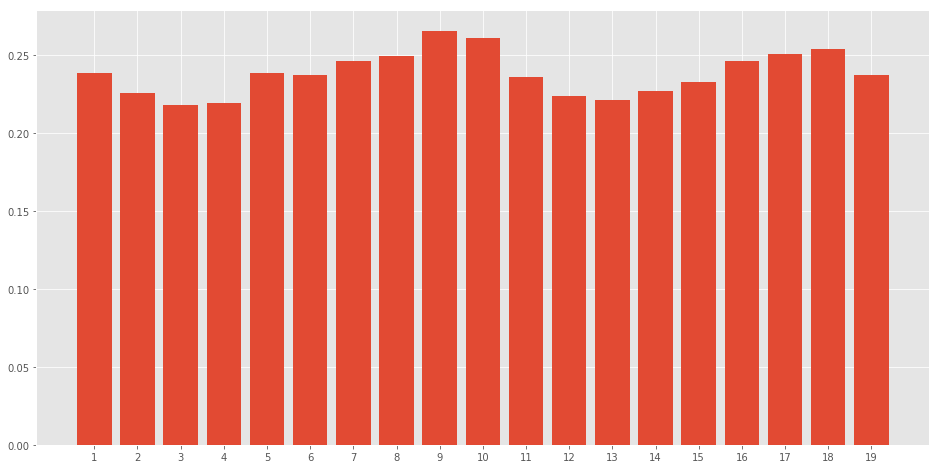

In [43]:
results = []
labels = []
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(features_train, labels_train)
    results.append(knn.score(features_test, labels_test))
    labels.append(i)
y_pos = np.arange(len(labels))
plt.figure(figsize=(16, 8));
plt.bar(y_pos, results, align='center', alpha=1)
plt.xticks(y_pos, labels)    